# Grouping Along the Time Dimension
Grouping along a time dimension will aggregate time steps according to a datetime attribute such as year, month,or day. Various statistics can be applied to the grouped data. As an example, the mean value of an index can be calculated and plotted spatially for each season. 

## Setup

In [1]:
import xarray as xr

In [2]:
ds = xr.open_dataset('../Data/netCDF/ds_BM_NP.nc')
ds

<xarray.Dataset>
Dimensions:      (time: 36, y: 200, x: 170)
Coordinates:
  * y            (y) float64 4.466e+06 4.466e+06 ... 4.447e+06 4.447e+06
  * x            (x) float64 9.604e+06 9.604e+06 9.604e+06 ... 9.62e+06 9.62e+06
    spatial_ref  int32 ...
  * time         (time) datetime64[ns] 2018-01-31 2018-02-28 ... 2020-12-31
Data variables:
    nbart_red    (time, y, x) float32 ...
    nbart_blue   (time, y, x) float32 ...
    nbart_green  (time, y, x) float32 ...
    nbart_nir_1  (time, y, x) float32 ...
Attributes:
    crs:           EPSG:3308
    grid_mapping:  spatial_ref

## Create a Spatial RGB Plot for Each Season
The first step is to create a grouped object and calculate a statistic of interest. For this example the median is used to reduce the impact of outliers. Following this it is an easy task to produce a facetgrid plot containing a subplot for each season.

In [7]:
ds_season = ds.groupby('time.season').median()
ds_season

<xarray.Dataset>
Dimensions:      (season: 4, y: 200, x: 170)
Coordinates:
  * y            (y) float64 4.466e+06 4.466e+06 ... 4.447e+06 4.447e+06
  * x            (x) float64 9.604e+06 9.604e+06 9.604e+06 ... 9.62e+06 9.62e+06
    spatial_ref  int32 3308
  * season       (season) object 'DJF' 'JJA' 'MAM' 'SON'
Data variables:
    nbart_red    (season, y, x) float32 444.0 450.5 468.5 ... 367.0 365.2 350.2
    nbart_blue   (season, y, x) float32 316.0 279.0 277.5 ... 245.5 259.0 240.8
    nbart_green  (season, y, x) float32 414.0 389.5 375.5 ... 297.8 338.0 323.0
    nbart_nir_1  (season, y, x) float32 1.499e+03 1.657e+03 ... 1.926e+03
Attributes:
    crs:           EPSG:3308
    grid_mapping:  spatial_ref

Notice that the time dimension has been replaced with a new dimension called 'season'. We will need to use `col='season'` when calling the `.imshow()` function.

C:\Users\mjdea\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\cm.py:489: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


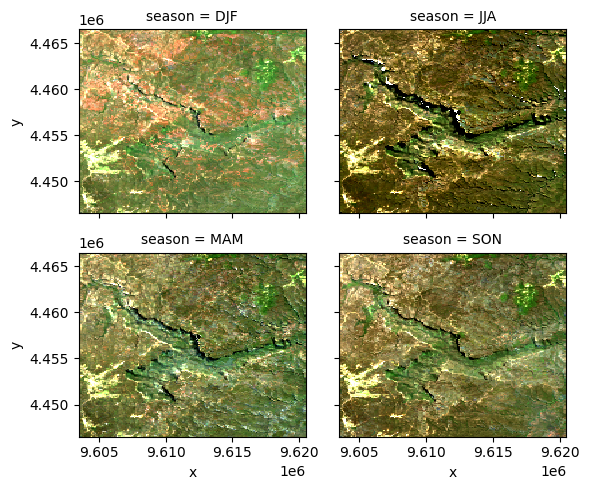

In [12]:
(ds_season[['nbart_red','nbart_green','nbart_blue']]
 .to_dataarray()
 .plot.imshow(col='season', col_wrap=2, size=2.5, robust=True)
)

## Create a Spatial Plot of NDVI for Each Season

In [13]:
NDVI = (ds.nbart_nir_1 - ds.nbart_red)/(ds.nbart_nir_1 + ds.nbart_red)

In [15]:
NDVI_season = NDVI.groupby('time.season').median()
NDVI_season

<xarray.DataArray (season: 4, y: 200, x: 170)>
array([[[0.37757626, 0.5178071 , 0.539888  , ..., 0.69433105,
         0.5269769 , 0.732834  ],
        [0.56839895, 0.5257497 , 0.57385826, ..., 0.7288981 ,
         0.6672535 , 0.74323213],
        [0.433291  , 0.54377973, 0.5300914 , ..., 0.7333877 ,
         0.7096644 , 0.74005514],
        ...,
        [0.62422186, 0.6124837 , 0.6335925 , ..., 0.7278304 ,
         0.67776835, 0.7080775 ],
        [0.6277303 , 0.60938954, 0.5839051 , ..., 0.65286237,
         0.7077498 , 0.74810606],
        [0.6904754 , 0.64239466, 0.5811162 , ..., 0.69146854,
         0.6990273 , 0.71454966]],

       [[0.5301399 , 0.660671  , 0.69771606, ..., 0.74326754,
         0.7420901 , 0.777292  ],
        [0.708774  , 0.6154072 , 0.7261555 , ..., 0.65369046,
         0.602245  , 0.6687515 ],
        [0.5981395 , 0.62660944, 0.67277217, ..., 0.6716963 ,
         0.6278239 , 0.6798197 ],
...
        [0.6517253 , 0.69271624, 0.7241379 , ..., 0.74415743,
         0.71207196, 0.7709288 ],
        [0.6060907 , 0.67281765, 0.72621566, ..., 0.69064975,
         0.75739163, 0.796868  ],
        [0.71361184, 0.6068562 , 0.71915716, ..., 0.67478263,
         0.7334899 , 0.7832393 ]],

       [[0.53838146, 0.5562295 , 0.6013507 , ..., 0.68960583,
         0.6914146 , 0.7289617 ],
        [0.5715749 , 0.53927577, 0.5409014 , ..., 0.74741787,
         0.6658823 , 0.7417953 ],
        [0.5796428 , 0.59930915, 0.5856967 , ..., 0.7432836 ,
         0.71864456, 0.74476624],
        ...,
        [0.6137164 , 0.6637989 , 0.6859441 , ..., 0.70447755,
         0.6196052 , 0.7206287 ],
        [0.6166333 , 0.6453457 , 0.6757201 , ..., 0.60186183,
         0.7250639 , 0.74782753],
        [0.7143112 , 0.6530515 , 0.60147405, ..., 0.6041825 ,
         0.66788936, 0.72755945]]], dtype=float32)
Coordinates:
  * y            (y) float64 4.466e+06 4.466e+06 ... 4.447e+06 4.447e+06
  * x            (x) float64 9.604e+06 9.604e+06 9.604e+06 ... 9.62e+06 9.62e+06
    spatial_ref  int32 3308
  * season       (season) object 'DJF' 'JJA' 'MAM' 'SON'

NDVI is a data array because it only has one variable, so we need to use `.plot()` rather than `.imshow()`. We still need to specify `col='season'` within `.plot()`.

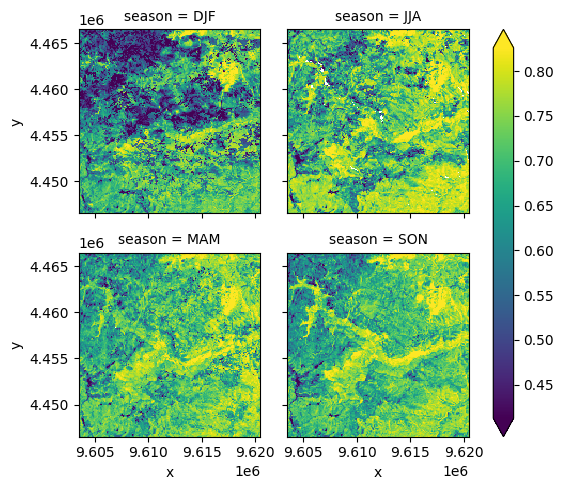

In [16]:
NDVI_season.plot(col='season', col_wrap=2, size=2.5, robust=True)